In [50]:
import pandas as pd
import seaborn as sns
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
url = 'http://bioinformatics.netmark.pl/teaching/dav_20/labs/lab8/ans.csv'
c = pd.read_csv(url)
df = pd.DataFrame(c)

In [9]:
def get_linear_eq(intercept, slope):
    return f'y = {intercept:.2f} + {slope:.3f}x'

def get_y(x, intercept, slope):
    return x*slope + intercept

In [10]:
dfs = {
    num: pd.DataFrame(
        {
            'x': pd.Series(df[f'x{num}']),
            'y': pd.Series(df[f'y{num}'])
        })
    for num in range(1, 5)
}

corrs = {
    num: dfs[num]['x'].corr(dfs[num]['y'])
    for num in range(1, 5)
}

linregresses = {
    num: scipy.stats.linregress(dfs[num]['x'], dfs[num]['y'])
    for num in range(1, 5)
}

rs = {
    num: linregresses[num].rvalue**2
    for num in range(1, 5)
}

intercepts = {
    num: linregresses[num].intercept
    for num in range(1, 5)
}

slopes = {
    num: linregresses[num].slope
    for num in range(1, 5)
}

lines = {
    num: get_linear_eq(linregresses[num].intercept, linregresses[num].slope)
    for num in range(1, 5)
}

In [11]:
point1_tables = {
    num: pd.DataFrame(
        {
            'Property': [
                'Mean of x',
                'Sample variance of x',
                'Mean of y',
                'Sample variance of y',
                'Correlation between x and y',
                'Linear regression line (y = a+bx)',
                'Coefficient of determination of the linear regression'
            ],
            'Value': [
                dfs[num]['x'].mean(),
                dfs[num]['x'].var(),
                round(dfs[num]['y'].mean(), 2),
                round(dfs[num]['y'].var(), 3),
                round(dfs[num]['x'].corr(dfs[num]['y']), 3),
                lines[num],
                round(rs[num], 2)
            ],
            'Accuracy': [
                'exact',
                'exact',
                'to 2 decimal places',
                'to 3 decimal places',
                'to 3 decimal places',
                'to 2 and 3 decimal places, respectively',
                'to 2 decimal places'
            ]
        }
    ) for num in range(1, 5)
}

In [28]:
print('Dataset 1')

Dataset 1


In [14]:
print('x1 -- y1')

point1_tables[1]

x1 -- y1


,Property,Value,Accuracy
0,Mean of x,9,exact
1,Sample variance of x,11,exact
2,Mean of y,7.5,to 2 decimal places
3,Sample variance of y,4.127,to 3 decimal places
4,Correlation between x and y,0.816,to 3 decimal places
5,Linear regression line (y = a+bx),y = 3.00 + 0.500x,"to 2 and 3 decimal places, respectively"
6,Coefficient of determination of the linear reg...,0.67,to 2 decimal places


In [15]:
print('x2 -- y2')
point1_tables[2]

x2 -- y2


,Property,Value,Accuracy
0,Mean of x,9,exact
1,Sample variance of x,11,exact
2,Mean of y,7.5,to 2 decimal places
3,Sample variance of y,4.128,to 3 decimal places
4,Correlation between x and y,0.816,to 3 decimal places
5,Linear regression line (y = a+bx),y = 3.00 + 0.500x,"to 2 and 3 decimal places, respectively"
6,Coefficient of determination of the linear reg...,0.67,to 2 decimal places


In [16]:
print('x3 -- y3')

point1_tables[3]

x3 -- y3


,Property,Value,Accuracy
0,Mean of x,9,exact
1,Sample variance of x,11,exact
2,Mean of y,7.5,to 2 decimal places
3,Sample variance of y,4.123,to 3 decimal places
4,Correlation between x and y,0.816,to 3 decimal places
5,Linear regression line (y = a+bx),y = 3.00 + 0.500x,"to 2 and 3 decimal places, respectively"
6,Coefficient of determination of the linear reg...,0.67,to 2 decimal places


In [17]:
print('x4 -- y4')

point1_tables[4]

x4 -- y4


,Property,Value,Accuracy
0,Mean of x,9,exact
1,Sample variance of x,11,exact
2,Mean of y,7.5,to 2 decimal places
3,Sample variance of y,4.123,to 3 decimal places
4,Correlation between x and y,0.817,to 3 decimal places
5,Linear regression line (y = a+bx),y = 3.00 + 0.500x,"to 2 and 3 decimal places, respectively"
6,Coefficient of determination of the linear reg...,0.67,to 2 decimal places


In [18]:
point1_final_table = pd.DataFrame(
        {
            'Property': [
                'Mean of x',
                'Sample variance of x',
                'Mean of y',
                'Sample variance of y',
                'Correlation between x and y',
                'Linear regression line (y = a+bx)',
                'Coefficient of determination of the linear regression'
            ],
            'Value': [
                np.mean([dfs[num]['x'].mean() for num in range(1, 5)]),
                np.mean([dfs[num]['x'].var() for num in range(1, 5)]),
                round(np.mean([dfs[num]['y'].mean() for num in range(1, 5)]), 2),
                round(np.mean([dfs[num]['y'].var() for num in range(1, 5)]), 3),
                round(np.mean([dfs[num]['x'].corr(dfs[num]['y']) for num in range(1, 5)]), 3),
                get_linear_eq(
                    np.mean([intercepts[num] for num in range(1, 5)]), 
                    np.mean([slopes[num] for num in range(1, 5)])
                ),
                round(np.mean([rs[num] for num in range(1, 5)]), 2)
            ],
            'Accuracy': [
                'exact',
                'exact',
                'to 2 decimal places',
                '+/- 0.003',
                'to 3 decimal places',
                'to 2 and 3 decimal places, respectively',
                'to 2 decimal places'
            ]
        }
    )

In [19]:
print('x -- y')

point1_final_table

x -- y


,Property,Value,Accuracy
0,Mean of x,9,exact
1,Sample variance of x,11,exact
2,Mean of y,7.5,to 2 decimal places
3,Sample variance of y,4.125,+/- 0.003
4,Correlation between x and y,0.816,to 3 decimal places
5,Linear regression line (y = a+bx),y = 3.00 + 0.500x,"to 2 and 3 decimal places, respectively"
6,Coefficient of determination of the linear reg...,0.67,to 2 decimal places


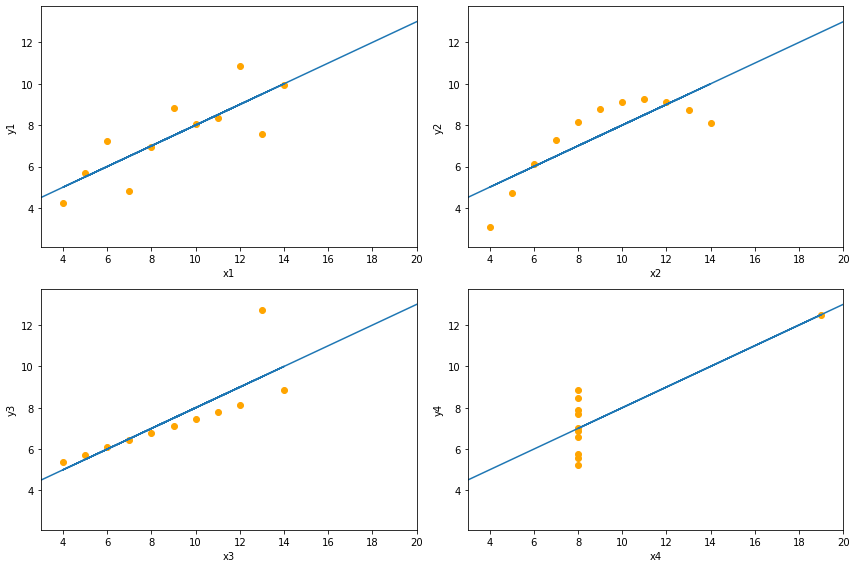

In [23]:
n = 2
min_x = min([dfs[num]['x'].min() for num in range(1, 5)]) - 1
min_y = min([dfs[num]['y'].min() for num in range(1, 5)]) - 1
max_x = max([dfs[num]['x'].max() for num in range(1, 5)]) + 1
max_y = max([dfs[num]['y'].max() for num in range(1, 5)]) + 1
fig, axs = plt.subplots(n, n, figsize=(12, 8))
for num in range(1, 5):
    ax = axs[math.floor((num - 1) / n), (num - 1) % n]
    cdf = dfs[num]
    ext_x = np.array([min_x - 100] + list(cdf['x']) + [max_x + 100])
    ax.scatter(cdf['x'], cdf['y'], color='orange')
    ax.plot(ext_x, ext_x * slopes[num] + intercepts[num])
    ax.set_xlabel(f'x{num}')
    ax.set_ylabel(f'y{num}')
    ax.set_ylim(min_y, max_y)
    ax.set_xlim(min_x, max_x)
    
fig.tight_layout()

In [24]:
url2 = 'http://bioinformatics.netmark.pl/teaching/dav_20/labs/lab8/ans2.tsv'
c2 = pd.read_csv(url2, sep="\t")
df2 = pd.DataFrame(c2)

In [25]:
dfg = df2.groupby('dataset')

In [27]:
ks = ', '.join(dfg.groups.keys())
print(f'Dataset 2, groups: {ks}')

Dataset 2, groups: a, bullseye, circle, d, dots, h, high, s, slant_down, slant_up, v, wide_lines, x


In [33]:
point2_tables = {
    group: pd.DataFrame(
        {
            'Property': [
                'Mean of x',
                'Mean of y',
                'SD of x',
                'SD of y',
                'Corr',
            ],
            'Value': [
                round(dfg.get_group(group)['x'].mean(), 2),
                round(dfg.get_group(group)['y'].mean(), 2),
                round(dfg.get_group(group)['x'].std(), 2),
                round(dfg.get_group(group)['y'].std(), 2),
                round(dfg.get_group(group)['x'].corr(dfg.get_group(group)['y']), 2)
            ],
            'Accuracy (up to 3 places)': [
                'to 2 decimal places',
                'to 2 decimal places',
                'to 2 decimal places',
                'to 2 decimal places',
                'to 2 decimal places',
            ]
        }
    ) for group in dfg.groups
}

In [34]:
print('a')

point2_tables['a']

a


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.27,to 2 decimal places
1,Mean of y,47.83,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.94,to 2 decimal places
4,Corr,-0.06,to 2 decimal places


In [35]:
print('bullseye')

point2_tables['bullseye']

bullseye


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.27,to 2 decimal places
1,Mean of y,47.83,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.94,to 2 decimal places
4,Corr,-0.07,to 2 decimal places


In [36]:
print('circle')

point2_tables['circle']

circle


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.27,to 2 decimal places
1,Mean of y,47.84,to 2 decimal places
2,SD of x,16.76,to 2 decimal places
3,SD of y,26.93,to 2 decimal places
4,Corr,-0.07,to 2 decimal places


In [37]:
print('d')

point2_tables['d']

d


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.26,to 2 decimal places
1,Mean of y,47.83,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.94,to 2 decimal places
4,Corr,-0.06,to 2 decimal places


In [38]:
print('dots')

point2_tables['dots']

dots


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.26,to 2 decimal places
1,Mean of y,47.84,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.93,to 2 decimal places
4,Corr,-0.06,to 2 decimal places


In [39]:
print('h')

point2_tables['h']

h


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.26,to 2 decimal places
1,Mean of y,47.83,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.94,to 2 decimal places
4,Corr,-0.06,to 2 decimal places


In [40]:
print('high')

point2_tables['high']

high


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.27,to 2 decimal places
1,Mean of y,47.84,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.94,to 2 decimal places
4,Corr,-0.07,to 2 decimal places


In [41]:
print('s')

point2_tables['s']

s


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.27,to 2 decimal places
1,Mean of y,47.84,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.93,to 2 decimal places
4,Corr,-0.06,to 2 decimal places


In [42]:
print('slant_down')

point2_tables['slant_down']

slant_down


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.27,to 2 decimal places
1,Mean of y,47.84,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.94,to 2 decimal places
4,Corr,-0.07,to 2 decimal places


In [43]:
print('slant_up')

point2_tables['slant_up']

slant_up


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.27,to 2 decimal places
1,Mean of y,47.83,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.94,to 2 decimal places
4,Corr,-0.07,to 2 decimal places


In [44]:
print('v')

point2_tables['v']

v


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.27,to 2 decimal places
1,Mean of y,47.84,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.94,to 2 decimal places
4,Corr,-0.07,to 2 decimal places


In [45]:
print('wide_lines')

point2_tables['wide_lines']

wide_lines


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.27,to 2 decimal places
1,Mean of y,47.83,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.94,to 2 decimal places
4,Corr,-0.07,to 2 decimal places


In [46]:
print('x')

point2_tables['x']

x


,Property,Value,Accuracy (up to 3 places)
0,Mean of x,54.26,to 2 decimal places
1,Mean of y,47.84,to 2 decimal places
2,SD of x,16.77,to 2 decimal places
3,SD of y,26.93,to 2 decimal places
4,Corr,-0.07,to 2 decimal places


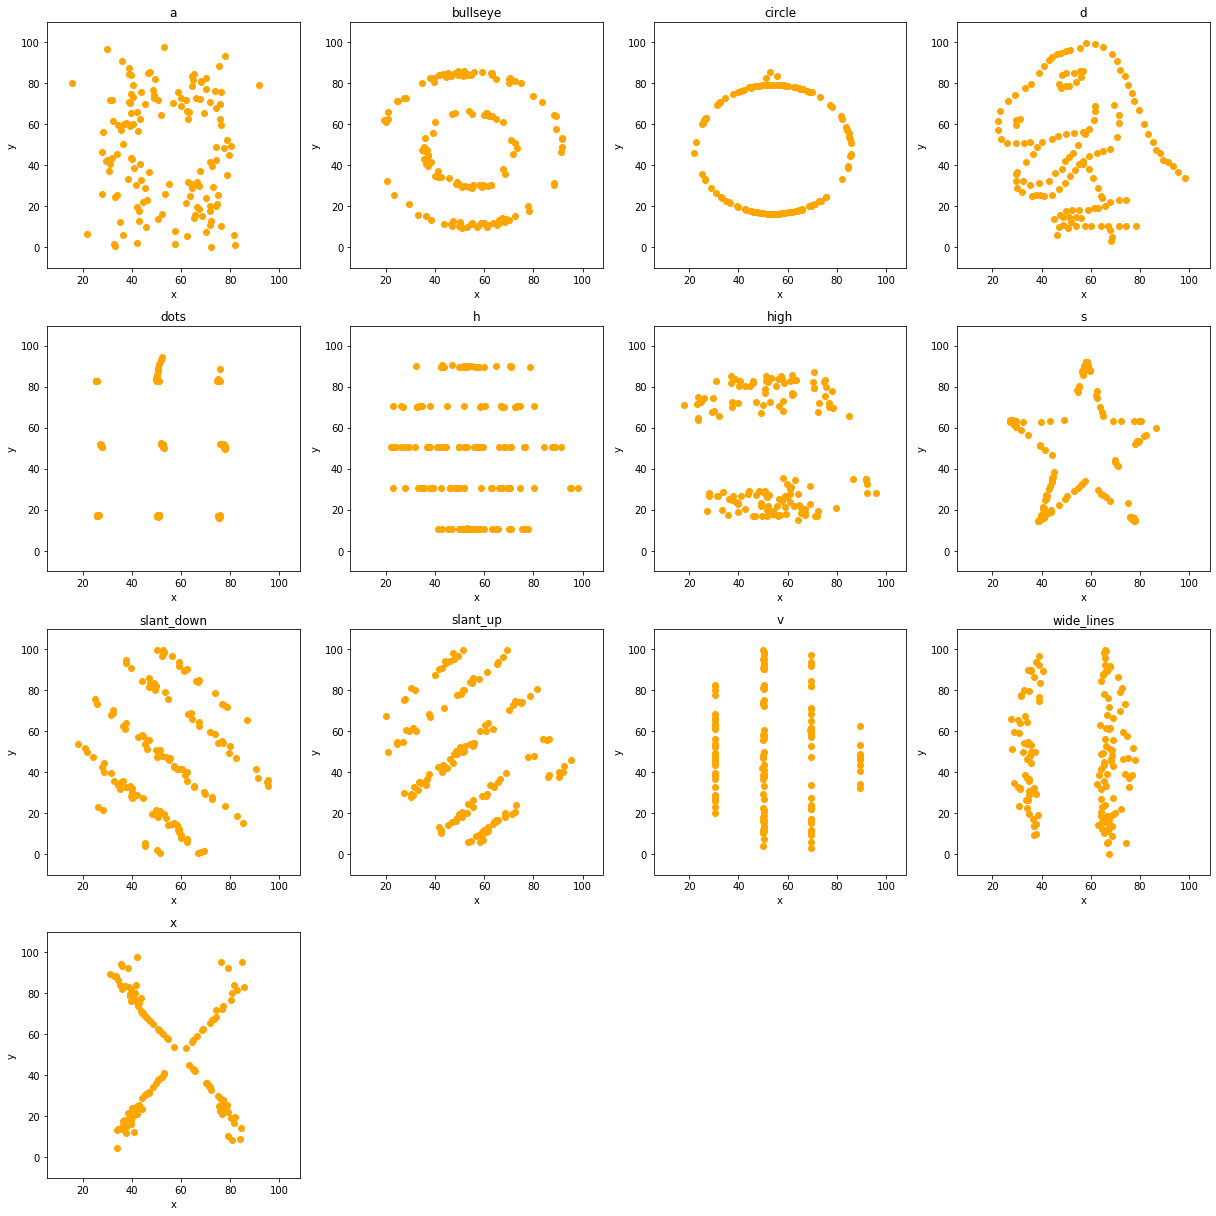

In [47]:
n = int(math.ceil(math.sqrt(len(dfg.groups.keys()))))
min_x = min([dfg.get_group(group)['x'].min() for group in dfg.groups]) - 10
min_y = min([dfg.get_group(group)['y'].min() for group in dfg.groups]) - 10
max_x = max([dfg.get_group(group)['x'].max() for group in dfg.groups]) + 10
max_y = max([dfg.get_group(group)['y'].max() for group in dfg.groups]) + 10
fig, axs = plt.subplots(n, n, figsize=(17, 17))
for num, group in enumerate(dfg.groups):
    ax = axs[math.floor(num / n), num % n]
    ax.scatter(dfg.get_group(group)['x'], dfg.get_group(group)['y'], color='orange')
    ax.set_title(group)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(min_y, max_y)
    ax.set_xlim(min_x, max_x)

for i in range(len(dfg.groups), n * n):
    fig.delaxes(axs[math.floor(i / n), i % n])    
    
fig.tight_layout()

In [48]:
print('`d` stands for dinosaur, `s` stands for star')

`d` stands for dinosaur, `s` stands for star
